<center><font size = "10"> Week 10 - Cells in Space <center>
<center><font size = "8">Tutorial 01: Centering a morphology<center>


    
As the sites of potential synapses are determined by the shapes of the axons and dendrites in a piece of brain tissue, the connectivity between two neurons will depend on their relative position and orientation in space. For example, a neuron with an ascending axon will only be likely to contact a different neuron if that neurons dendrites are situated above it.

In [1]:
# Useful functions
def shift_morphology(morph,shift):
    morph2 = morph.transform(lambda p: p + shift)
    return morph2
       

def center_morphology(morph):
    center = morph.soma.center.copy()
    return shift_morphology(morph,-center)

# Poorman's plotting of morphologies
def plot_morphology(morph, plane = 'XY',somaOnly = False):
    colors_dict={nm.BASAL_DENDRITE:'red', 
            nm.APICAL_DENDRITE:'green',
            nm.AXON:'blue',
            nm.SOMA:'black'}

    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
   
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors_dict[n.type.value],marker='.')
    pts = morph.soma.center
    
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors_dict[nm.NeuriteType.soma.value],marker='D')
   
def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    fig = plt.figure()
    fig.suptitle(plane)
    
    for i,m in enumerate(morphlist):
        plot_morphology(m, plane = plane, somaOnly = somaOnly)
        

soma center: [-0.396066  8.076094  2.546458]


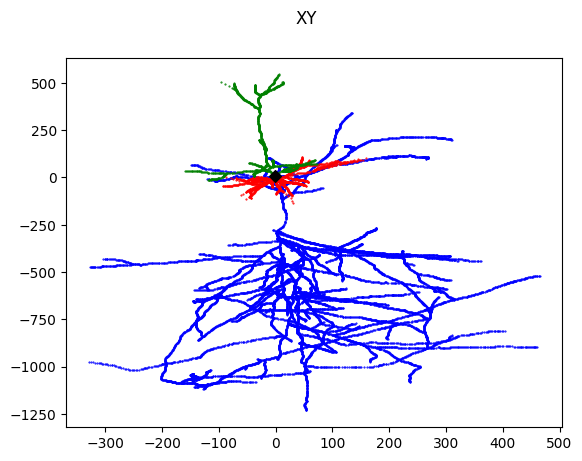

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm
from neurom import view
# Load a morphology
morph = nm.load_morphology('Pyr_01.swc')

# Check that it is not centered
print('soma center:',morph.soma.center)
# Visualize it
plot_morphologies([morph])

## Center it

soma center: [0. 0. 0.]


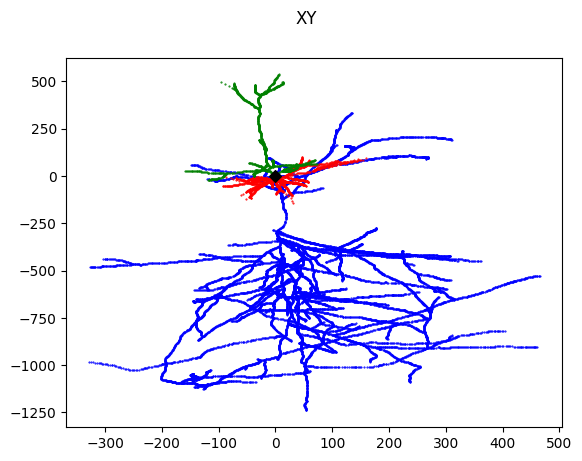

In [3]:
# Center
morph=center_morphology(morph)

# Check that it is centered
print('soma center:',morph.soma.center)
# Visualize it
plot_morphologies([morph])

# Placing a morphology

## Define a cubic volume and sample random positions inside it

In [4]:
import numpy as np
rng = np.random.default_rng()

N = 3 # number of positions
volume = [[1000,3000],[5000,7000],[-2000,2000]] # volume bounds [um]

# get positions in required ranges
pos = rng.random((N,3)) # in [0,1)
for i,x in enumerate(volume):
    pos[:,i] = (x[1] - x[0]) * pos[:,i] + x[0]
    
pos # print positions

array([[2006.80344218, 6088.24649796, 1323.70071185],
       [1570.71600342, 5072.84793295, 1093.79684342],
       [1328.58683226, 6812.85696552,  198.18519422]])

## Load morphologies and place them at those positions (after centering)

In [5]:
import neurom as nm
morph_files = ['Pyr_01.swc','Pyr_02.swc', 'Int_01.swc']
morphs = [nm.load_morphology(x) for x in morph_files]

# place all morphologies
for i,m in enumerate(morphs):
    m=center_morphology(m)
    m=shift_morphology(m,pos[i])
    morphs[i]=m

[x.soma.center for x in morphs] # print centers

[array([2006.8035, 6088.2466, 1323.7007], dtype=float32),
 array([1570.7161, 5072.848 , 1093.7969], dtype=float32),
 array([1328.5868, 6812.857 ,  198.1852], dtype=float32)]

## Visualize them

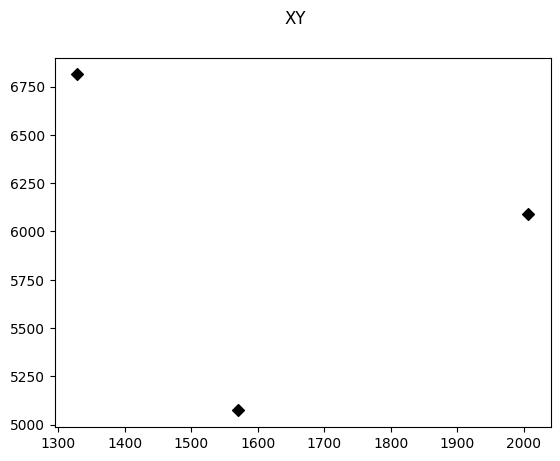

In [6]:
# Plot soma locations
plot_morphologies(morphs,somaOnly = True)

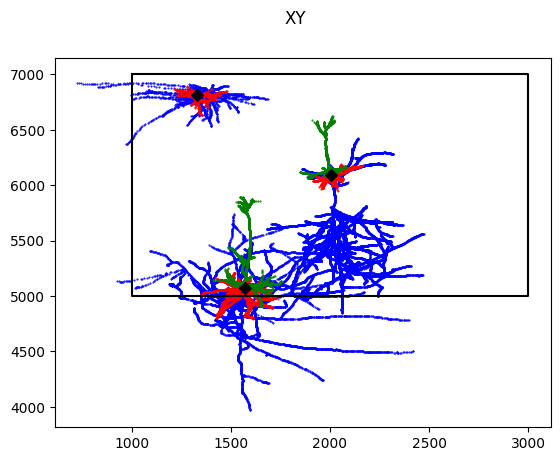

In [7]:
# Plot whole morphologies
plot_morphologies(morphs, somaOnly=False)
# Plot volume containing somas
plt.plot((volume[0][0],volume[0][1],volume[0][1],volume[0][0],volume[0][0]),
         (volume[1][1],volume[1][1],volume[1][0],volume[1][0],volume[1][1]),c='black')